In [45]:
%load_ext autoreload
%autoreload 2
%aimport
%matplotlib inline

Modules to reload:
all-except-skipped

Modules to skip:



# Posters Analyzis

## Getting Actors Images

In [13]:
import tmdbsimple as tmdb

tmdb.API_KEY = "API KEY"


In [7]:
search.person(query="Matt Damon")

{'page': 1,
 'total_results': 1,
 'total_pages': 1,
 'results': [{'popularity': 22.481,
   'known_for_department': 'Acting',
   'gender': 2,
   'id': 1892,
   'profile_path': '/elSlNgV8xVifsbHpFsqrPGxJToZ.jpg',
   'adult': False,
   'known_for': [{'release_date': '2014-11-05',
     'id': 157336,
     'vote_count': 20197,
     'video': False,
     'media_type': 'movie',
     'vote_average': 8.3,
     'title': 'Interstellar',
     'genre_ids': [12, 18, 878],
     'original_title': 'Interstellar',
     'original_language': 'en',
     'adult': False,
     'backdrop_path': '/xu9zaAevzQ5nnrsXN6JcahLnG4i.jpg',
     'overview': 'Interstellar chronicles the adventures of a group of explorers who make use of a newly discovered wormhole to surpass the limitations on human space travel and conquer the vast distances involved in an interstellar voyage.',
     'poster_path': '/nBNZadXqJSdt05SHLqgT0HuC5Gm.jpg'},
    {'release_date': '2015-09-30',
     'id': 286217,
     'vote_count': 12972,
     'vid

In [8]:
m = tmdb.People(1892)


In [13]:
m.images()

{'profiles': [{'iso_639_1': None,
   'width': 1000,
   'height': 1500,
   'vote_count': 20,
   'vote_average': 5.158,
   'file_path': '/3XH8bkV1Oz24pOMcZbraEL5EtwM.jpg',
   'aspect_ratio': 0.66666666666667},
  {'iso_639_1': None,
   'width': 1000,
   'height': 1500,
   'vote_count': 7,
   'vote_average': 5.04,
   'file_path': '/r9592oqF1XhwTMngUHSYHgFO8Zh.jpg',
   'aspect_ratio': 0.66666666666667},
  {'iso_639_1': None,
   'width': 1000,
   'height': 1500,
   'vote_count': 5,
   'vote_average': 5.028,
   'file_path': '/dAnL1P3CJxcJ0SXuQeZJznhC1VP.jpg',
   'aspect_ratio': 0.66666666666667},
  {'iso_639_1': None,
   'width': 440,
   'height': 660,
   'vote_count': 11,
   'vote_average': 5.212,
   'file_path': '/dziqtcXqS2xcf1a5FIpfmKoCO2A.jpg',
   'aspect_ratio': 0.66666666666667},
  {'iso_639_1': None,
   'width': 1300,
   'height': 1950,
   'vote_count': 6,
   'vote_average': 5.114,
   'file_path': '/du7HBu6MEv8bAaxos8jjbTn9QJq.jpg',
   'aspect_ratio': 0.66666666666667},
  {'iso_639_1'

## Face Recognition

In [ ]:
! conda install -c menpo dlib

In [ ]:
!pip install face_recognitiom

In [ ]:
!conda install --yes -c akode face_recognition_models

### Compare Faces

In [2]:
import face_recognition
known_image = face_recognition.load_image_file("images/Bale3.jpg")
unknown_image = face_recognition.load_image_file("images/ford-v-ferrari2.jpg")

known_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.compare_faces([known_encoding], unknown_encoding)

In [47]:
results

[False]

In [38]:
!wget https://image.tmdb.org/t/p/original/vecCvACI2QhSE5fOoANeWDjxGKM.jpg

--2019-12-12 09:18:32--  https://image.tmdb.org/t/p/original/vecCvACI2QhSE5fOoANeWDjxGKM.jpg
Resolving image.tmdb.org (image.tmdb.org)... 104.16.59.155, 104.16.61.155, 104.16.60.155, ...
Connecting to image.tmdb.org (image.tmdb.org)|104.16.59.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68830 (67K) [image/jpeg]
Saving to: ‘vecCvACI2QhSE5fOoANeWDjxGKM.jpg’

100%[======================================>] 68,830      --.-K/s   in 0.06s   

2019-12-12 09:18:32 (1.10 MB/s) - ‘vecCvACI2QhSE5fOoANeWDjxGKM.jpg’ saved [68830/68830]



### Face Recogmition With Boxes

In [3]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.
matt_image = face_recognition.load_image_file("images/Matt.jpg")
bale_image = face_recognition.load_image_file("images/Bale3.jpg")
unknown_image = face_recognition.load_image_file("images/ford-v-ferrari2.jpg")

matt_encoding = face_recognition.face_encodings(matt_image)[0]
bale_encoding = face_recognition.face_encodings(bale_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]


# Create arrays of known face encodings and their names
known_face_encodings = [
    matt_encoding,
    bale_encoding
]
known_face_names = [
    "Matt",
    "Bale"
]
print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 2 images.


[True, False]
[False, True]


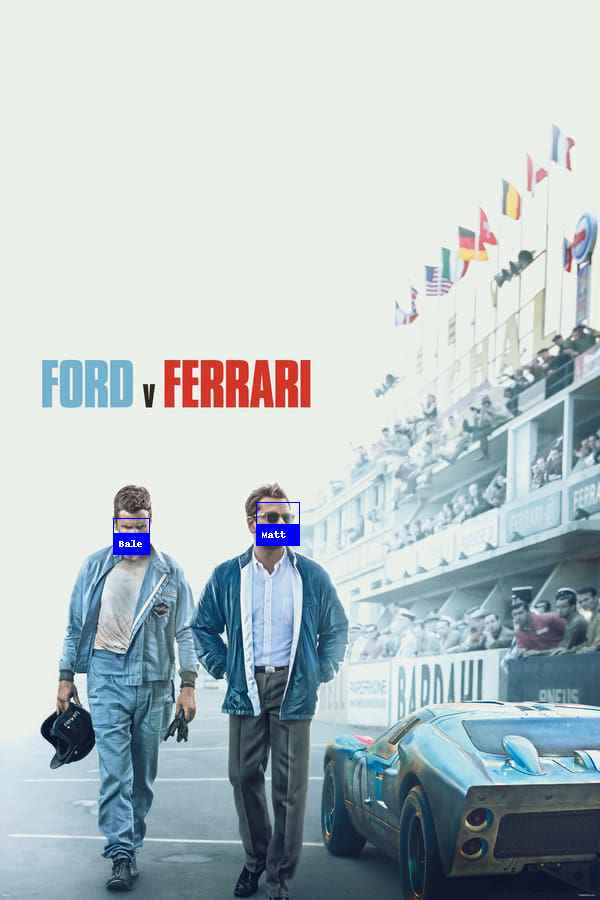

In [4]:
# Load an image with an unknown face

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    print(matches)
    name = "Unknown"

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)

In [36]:
top

518

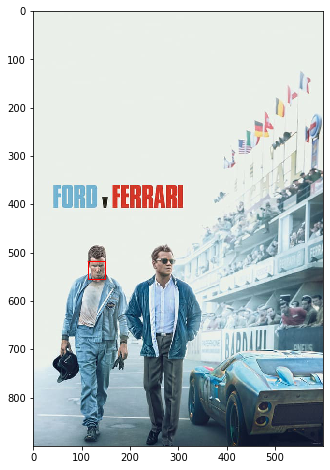

In [53]:
import matplotlib.patches as patches
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt


image = plt.imread("images/ford-v-ferrari2.jpg")

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(image, interpolation='nearest')
p = patches.Rectangle(
    (left, bottom), right-left, top - bottom,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(p)
ax.set_aspect(1)

plt.show()

In [58]:
!git clone https://github.com/HectorAnadon/Face-expression-and-ethnic-recognition.git

Cloning into 'Face-expression-and-ethnic-recognition'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 24 (delta 3), reused 0 (delta 0), pack-reused 15
Unpacking objects: 100% (24/24), done.
Checking out files: 100% (10/10), done.


## Ethnicity Recognition

In [65]:
import os
import sys
nb_dir = os.path.dirname(f"{os.getcwd()}/face_network")
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [75]:
!pip install opencv-python

     |████████████████████████████████| 28.3MB 45.3MB/s eta 0:00:01


In [76]:
from face_network.face_network import create_face_network
import cv2
import argparse
import numpy as np
from keras.optimizers import Adam, SGD

ETHNIC = {0: 'Asian', 1: 'Caucasian', 2: "African", 3: "Hispanic"}

def predict_ethnic(name):
	means = np.load('models/means_ethnic.npy')

	model = create_face_network(nb_class=4, hidden_dim=512, shape=(224, 224, 3))
	model.load_weights('models/weights_ethnic.hdf5')

	im = cv2.imread(name, cv2.IMREAD_COLOR)
	im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
	im = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
	im = cv2.resize(im, (224, 224))
	im = np.float64(im)
	im /= 255.0
	im = im - means

	return model.predict(np.array([im]))

In [157]:
from keras.models import load_model

# Returns a compiled model identical to the previous one
model = load_model('models/racenet_vgg16_25ep_seed343.h5')

/storage/homedir/dima/miniconda3/envs/subs2graph/lib/python3.6/site-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [181]:
def predict_ethnic(name, model):
    im = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
    im = cv2.resize(im, (100, 100))
    img = Image.fromarray(im)
    img.show()
    display(img)
    im = np.float64(im)
    im /= 255.0
    im = im.reshape((100,100,1))
    return model.predict_classes(np.array([im]))

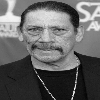

array([2])

In [182]:
predict_ethnic("images/dkll8h1uYzgmliLrnTE0429WLjp.jpg", model)

In [149]:
result = predict_ethnic("images/LMK-062745-Dudley-OShaughnessy.jpg")

TypeError: predict_ethnic() missing 1 required positional argument: 'model'

In [106]:
print(ETHNIC[np.argmax(result)])


African


## OCR

In [ ]:
!conda install --yes -c conda-forge tesseract

In [183]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.0-py2.py3-none-any.whl size=20970 sha256=72dfd2dc06d2ad29428455b70aa971b0cabcc3e2eb450a12c955a9ef61a2a7b7
  Stored in directory: /storage/homedir/dima/.cache/pip/wheels/78/c9/ac/4cb76bd547f9970070522439e5203ba7926c5c5c4f131583ea
Successfully built pytesseract


In [10]:
import cv2
import pytesseract

img_cv = cv2.imread('images/ford-v-ferrari-movie-poster.jpg', cv2.IMWRITE_PAM_FORMAT_BLACKANDWHITE)

# By default OpenCV stores images in BGR format and since pytesseract assumes RGB format,
# we need to convert from BGR to RGB format/mode:
img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
print(pytesseract.image_to_data(img_rgb))
# OR
# img_rgb = Image.frombytes('RGB', img_cv.shape[:2], img_cv, 'raw', 'BGR', 0, 0)
# print(pytesseract.image_to_boxes(img_rgb))
d = pytesseract.image_to_data(img_cv, output_type=pytesseract.Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img_cv, (x, y), (x + w, y + h), (0, 255, 0), 2)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	500	740	-1	
2	1	1	0	0	0	353	171	147	131	-1	
3	1	1	1	0	0	353	171	147	131	-1	
4	1	1	1	1	0	353	171	147	131	-1	
5	1	1	1	1	1	353	171	147	131	95	  
2	1	2	0	0	0	35	274	224	19	-1	
3	1	2	1	0	0	35	274	224	19	-1	
4	1	2	1	1	0	35	274	224	19	-1	
5	1	2	1	1	1	35	275	37	18	96	MATT
5	1	2	1	1	2	78	274	51	19	79	DAMON
5	1	2	1	1	3	143	274	77	19	78	GHRISTIAN
5	1	2	1	1	4	226	275	33	18	96	BALE
2	1	3	0	0	0	35	341	72	12	-1	
3	1	3	1	0	0	35	341	72	12	-1	
4	1	3	1	1	0	35	341	72	12	-1	
5	1	3	1	1	1	35	341	57	12	87	NOVEMBER
5	1	3	1	1	2	95	341	12	12	78	15


In [11]:
from PIL import Image, ImageDraw

img = Image.fromarray(img_cv)
img.show()

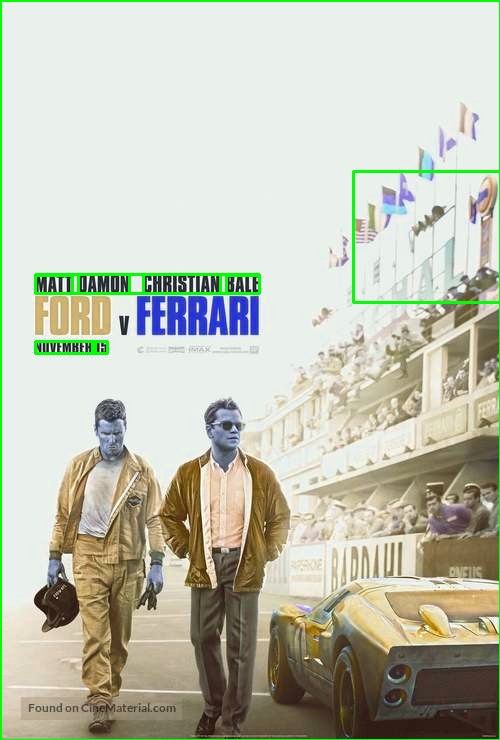

In [12]:
display(img)
